## Digit Recognition program

In this notebook I will explain a python program I was asked to create for my Emerging Tech Module.
The purpose of the program was to
- efficient load the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset into memory
- create a neural network
- develop and train the neural network to recognise handwritten digits
- create a working model 
- allow the program to import an image of a handwritten digit from your machine
- get the model to interpret what the digit was 

In order to run this notebook, you will need to download the files from MNIST and <span style="color:red">save them in a folder called "data" </span>in this repo.

![files](images/files.PNG)

#### Imports needed

In [1]:
import gzip # used for unzipping
import os.path # used to load existing model
import tkinter as tk # used to load img
from random import randint # generate random values
from tkinter import filedialog #for uploading image files

import keras as kr # for creating the network
import matplotlib.pyplot as plt
import numpy as np # for shaping the data 
import sklearn.preprocessing as pre # for classification and binary encoding 
from keras.preprocessing import image

C:\Users\Ray\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Creating the network

#### initialise the network using the sequential model this allows us to add layers

In [2]:
model = kr.models.Sequential()

# Add a hidden layer with 1000 neurons and an input layer with 784.
model.add(kr.layers.Dense(units=1000, activation='relu', input_dim=784))
model.add(kr.layers.Dense(units=1000, activation='relu'))
model.add(kr.layers.Dense(units=1000, activation='relu'))
model.add(kr.layers.Dense(units=1000, activation='relu'))

# Add a 10 neuron output layer.
model.add(kr.layers.Dense(units=10, activation='softmax'))

# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

[Sequential Model](https://keras.io/getting-started/sequential-model-guide/)<br>
###### Hidden Layers
The first 4 layers are hidden dense layers where the dataset passes through in order for the network to learn.<br> 
The results are sent from the middle layers to the output layer and compared to the number that has been sent in as image data.<br>
###### Output Layers
The last layer is the Softmax Activation layer. Softmax activation enables us to calculate the output based on the probabilities. Each class is assigned a probability and the class with the maximum probability is the model’s output for the input.

####  Unzips the files and reads in as bytes

In [3]:
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()

#### reads them into memory  
Here we read in the 60000 images in the file and reshape them into 28x28 pixel arrays using the numpy array function.<br>
We are also reading in the labels file so the network can check if the prediction was right.

In [4]:
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8)
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

Here we convert the data into a single array with each image 784 bytes(28x28)<br>
Then the label are coverted to binary values based on its decimal value.<br>
We then print the number 5 and it binary value as an example.

In [5]:
inputs = train_img.reshape(60000, 784)/255
# For encoding categorical variables.
encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

print(train_lbl[0], outputs[0])

5 [0 0 0 0 0 1 0 0 0 0]


### Training or loading the model
In this if statment we either train or load an existing model.<br>
If the model already exists the program will just use that one and load it up.<br> The model is saved in a folder called data where the zipped files are stored and is created on the first run of the program.<br>
When there is no existing model the images are sent in as input and the labels are fed in as the expected outcome.<br>
Each of the 15 epochs processes the full 60000 images and the image are sent in batches of 100.


In [6]:
if os.path.isfile('data/model.h5'): 
        model = kr.models.load_model('data/model.h5')
# if model already exist uses it
else:
    model.fit(inputs, outputs, epochs=15, batch_size=100)
    model.save("data/model.h5")
    #makes model and saves it 


If this is the first time the program is run it will begin creating the model.<br>
To view the output of the program look at the [mnist-dataset](mnist-dataset.ipynb) notebook contained in this repo.

### Testing the network
In the next cell we see how we unzip and load in to memory the test images and labels, using the same way we did the training files.<br>
Images and labels are then shaped into single arrays. The 10000 images of 784 bytes and the labels in to binary values.

In [7]:
# ungzips test images and labels
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
# stores them into memory    
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8)
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

outcome = (encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum()

In [8]:
print(outcome)
print("\nModel  is", outcome/100,"% Accurate\n")

9614

Model  is 96.14 % Accurate



In the cell above the progam tells us the model was able to predict 9614 of the 10000 images right, giving us 96.14% accuracy

### Testing the network
For this process I have created 2 methods.<br>
The first method asks the user how many test they would like to run.<br>
It then grabs that many random tests from the test data and tries to predict the number.<br>
It prints the index and array of the test case so you can know it is not testing the same data each time.<br>
It then print the prediction and the test number to screen(this will be shown at the end of the nootebook)

In [9]:
def randomTests():
    amm = int(input(" How many tests would you like to run ? "))
    from random import randint
    for i in range(amm):
        print("Test Case : ", i+1,"\n")
        x = randint(0, 9999)
        print("Test Case index: ", x, "\n")
        print("Test Case array: ")
        test = model.predict(test_img[x:x+1])
        # print the array and index of the test case
        print(test, "\n")
        pred_result = test.argmax(axis=1)

        print("program has predicted :  ",  pred_result)
        print(" number is :  ", test_lbl[x:x+1])
        print("===================")


The second method allows the user to upload an image of there own to be predicted.<br>
A file select box open and the user picks the image.<br>
The image is display in a window on the screen, after you close the window the program tries to correctly predict the number.

In [10]:
def loadImage():
    root = tk.Tk()
    root.withdraw()
    #https://stackoverflow.com/questions/9319317/quick-and-easy-file-dialog-in-python
   
    file_path = filedialog.askopenfilename()# opens file select window
    img = image.load_img(path=file_path,color_mode = "grayscale",target_size=(28,28,1))
    #loads image into PIL format
    image1 = np.array(list(image.img_to_array(img))).reshape(1, 784).astype(np.uint8) / 255.0
    # shapes array 
    plt.imshow(img)
    plt.show()
    # plots and displays image
    test = model.predict(image1)
    # runs test of image on model
    print("program has predicted : ", test.argmax(axis=1))
#https://towardsdatascience.com/basics-of-image-classification-with-keras-43779a299c8b

The final part of the program is a simple menu that allow the user to pick which type of test they want to preform.
 - 1 to load an image
 - 2 to run test case 
 - 3 to exit program

Load an image on your system
        1 to load image
        2 to run test
        3 to exit 
 What would you like to do ? 1


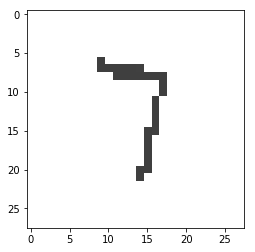

program has predicted :  [7]
        1 to load image
        2 to run test
        3 to exit 
 What would you like to do ? 2
 How many tests would you like to run ? 2
Test Case :  1 

Test Case index:  3175 

Test Case array: 
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] 

program has predicted :   [1]
 number is :   [1]
Test Case :  2 

Test Case index:  9403 

Test Case array: 
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]] 

program has predicted :   [6]
 number is :   [6]
        1 to load image
        2 to run test
        3 to exit 


In [ ]:
print("Load an image on your system")

opt=True
while opt:
    print("============================")
    print("""        1 to load image
        2 to run test
        3 to exit """)
    opt= input(" What would you like to do ? ")
    print("============================")
    #https://stackoverflow.com/questions/19964603/creating-a-menu-in-python

    if opt == "1":
        loadImage()
    elif opt == "2":
        randomTests()
    elif opt == "3":
        exit()
    else: 
        print("Invalid Entry")


### End